In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [9]:
def System(r,t):
    x,y=r
    dx=2*x-y
    dy=2*y+x
    return np.array([dx,dy])

In [10]:
def IntegratorAdams4Moulton5(f,r0,t):   
    h = t[1] - t[0]
    print(h)
    
    y = np.zeros_like(t)
    vx = np.zeros_like(t)
    
    y[0] = r0[0]
    vx[0] = r0[1]
    
    K11 = np.zeros(2)
    K12 = np.zeros(2)
    K13 = np.zeros(2)
    K14 = np.zeros(2)
    
    
    present = np.array([y[0]])
 
    # RungeKutta4, halla los 3 puntos siguientes para obtener 4 puntos en total
    for i in range(1,5):
        K11 = f(np.array([y[i-1],vx[i-1]]),t[i-1])
        K12 = f(np.array([y[i-1],vx[i-1]])+0.5*h*K11,t[i-1])
        #print(np.array([x[i-1],vx[i-1]]), np.array([x[i-1],vx[i-1]])+0.5*h*K11)
        K13 = f(np.array([y[i-1],vx[i-1]])+0.5*h*K12,t[i-1])
        K14 = f(np.array([y[i-1],vx[i-1]])+h*K13,t[i-1])
        
        y[i] = y[i-1] + (h/6)*(K11[0]+2*K12[0]+2*K13[0]+K14[0])
        vx[i] = vx[i-1] + (h/6)*(K11[1]+2*K12[1]+2*K13[1]+K14[1])
    
    yc = y.copy()
    vxc = vx.copy()
    
    for i in range(5,len(t)):
        
        present = np.array([y[i-1],vx[i-1]])
        past1 = np.array([y[i-2],vx[i-1]])
        past2 = np.array([y[i-3],vx[i-1]])
        past3 = np.array([y[i-4],vx[i-1]])
        past4 = np.array([y[i-5],vx[i-1]])
        
        Kn_3 = f(present,t[i-1])
        Kn_2 = f(past1,t[i-2])
        Kn_1 = f(past2,t[i-3])
        Kn   = f(past3,t[i-4])        
        Kn_  = f(past4,t[i-5])
        
        
        y[i] = y[i-1] + h*(1901*Kn_3[0]-2774*Kn_2[0]+2616*Kn_1[0]-1274*Kn[0]+251*Kn_[0])/720
        vx[i] = vx[i-1] + h*(1901*Kn_3[1] - 2774*Kn_2[1] + 2616*Kn_1[1] - 1274*Kn[1] + 251*Kn_[1]) / 720
        
        yc[i] = y[i]
        vxc[i] = vx[i]
        
        # Futuro
        futuro = np.array([y[i],vx[i-1]])
        Kn_4 = f(futuro,t[i])
        
        yc[i] = yc[i-1] + h*(475*Kn_4[0]+1427*Kn_3[0]-798*Kn_2[0] + 482*Kn_1[0] -173*Kn[0] +27*Kn_[0])/1440
        vxc[i] = vxc[i-1] + h*(475*Kn_4[1] + 1427*Kn_3[1] - 798*Kn_2[1] + 482*Kn_1[1] - 173*Kn[1] + 27*Kn_[1]) / 1440
    
    return y,yc,vxc,vx#x,vx,xc,vxc

In [18]:
t = np.linspace(0,20,10000)
r0 = [-1., -1.]
sol3 = IntegratorAdams4Moulton5(System,r0,t)
x_,y_=sol3[2],sol3[3]

0.002000200020002


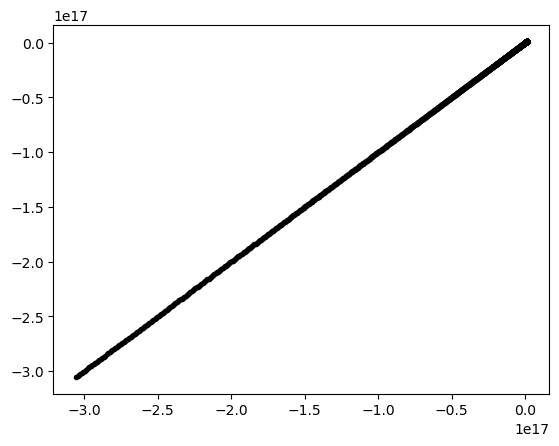

In [19]:
plt.scatter(sol3[2],sol3[3],marker='.',color='k')

In [20]:
M = np.array([[2, -1], [1, 2]])
eigenvalues, eigenvectors = np.linalg.eig(M)

print("Valores propios:", eigenvalues)
print("Vectores propios:")
for i in range(len(eigenvalues)):
    print("Valor propio:", eigenvalues[i])
    print("Vector propio:", eigenvectors[:, i])

Valores propios: [2.+1.j 2.-1.j]
Vectores propios:
Valor propio: (2+1j)
Vector propio: [0.70710678+0.j         0.        -0.70710678j]
Valor propio: (2-1j)
Vector propio: [0.70710678-0.j         0.        +0.70710678j]


El punto crítico es 0,0 que es donde convergen